In [1]:
# 필요한 라이브러리 호출

# 기초
import numpy as np
import pandas as pd
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from plotly import express as px

# 사이킷런 분류
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


# 지도학습

# 회귀 종류
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb
import lightgbm as lgb


# 분류 종류
# import xgboost as xgb # 추후 변경
import lightgbm as lgb # 추후 변경
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


# 비지도학습
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 평가용
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#pkl 파일로 만들기

# !pip install mlxtend --quiet

import joblib

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data/customer.csv'
                )
df

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96
...,...,...,...
240449,4716561796955522,shopping,4.93
240450,30074693890476,shopping,140.12
240451,30404291151692,health_fitness,37.79
240452,4922710831011201,entertainment,17.50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    240454 non-null  int64  
 1   category  240454 non-null  object 
 2   amt       240454 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [4]:
df.describe()

,cc_num,amt
count,2.404540e+05,240454.000000
mean,3.365543e+17,69.758079
std,1.191447e+18,150.060270
min,6.049559e+10,1.000000
25%,2.131124e+14,9.740000
50%,2.720433e+15,47.530000
75%,4.642255e+15,82.950000
max,4.956829e+18,21437.710000


In [5]:
# 카드번호 확인
df.cc_num.unique()

array([   2703186189652095,        630423337322,      38859492057661,
          3534093764340240,     375534208663984,    4767265376804500,
            30074693890476,    6011360759745864,    4922710831011201,
          2720830304681674,       4642894980163,     377234009633447,
           180042946491150,    5559857416065248,    3514865930894695,
          6011999606625827,    6011860238257910,    3565423334076143,
          2348245054386329, 4956828990005111019, 4469777115158234880,
          2305336922781618,     180048185037117,        630441765090,
       4428780983793657331,     343464013864032,     374930071163758,
          4334230547694630, 4225990116481262579,    4260059589824237,
           180094608895855, 4599735407877245080,        630412733309,
          2712209726293386,     374125201044065,     349612764943496,
          3598215285024754,     213141712584544,      30561214688470,
          4789911625179723,        676372984911,      30011465039817,
          4642255475

In [13]:
customer = pd.get_dummies(df, columns=['category'])
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cc_num                   240454 non-null  int64  
 1   amt                      240454 non-null  float64
 2   category_entertainment   240454 non-null  uint8  
 3   category_food_dining     240454 non-null  uint8  
 4   category_gas_transport   240454 non-null  uint8  
 5   category_grocery         240454 non-null  uint8  
 6   category_health_fitness  240454 non-null  uint8  
 7   category_home            240454 non-null  uint8  
 8   category_kids_pets       240454 non-null  uint8  
 9   category_misc            240454 non-null  uint8  
 10  category_personal_care   240454 non-null  uint8  
 11  category_shopping        240454 non-null  uint8  
 12  category_travel          240454 non-null  uint8  
dtypes: float64(1), int64(1), uint8(11)
memory usage: 6.2 MB


In [15]:
p = customer.iloc[:,2:]

In [16]:
# 카테고리 * 소비액
for col_name in p.columns:
    customer[col_name] = customer[col_name]*customer['amt']

In [17]:
customer

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [18]:
customer_agg = customer.groupby('cc_num').sum()
customer_agg
customer_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 60495593109 to 4956828990005111019
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      100 non-null    float64
 1   category_entertainment   100 non-null    float64
 2   category_food_dining     100 non-null    float64
 3   category_gas_transport   100 non-null    float64
 4   category_grocery         100 non-null    float64
 5   category_health_fitness  100 non-null    float64
 6   category_home            100 non-null    float64
 7   category_kids_pets       100 non-null    float64
 8   category_misc            100 non-null    float64
 9   category_personal_care   100 non-null    float64
 10  category_shopping        100 non-null    float64
 11  category_travel          100 non-null    float64
dtypes: float64(12)
memory usage: 10.2 KB


In [19]:
# 표준 스케일링 시작

st = StandardScaler()

In [23]:
st_customer = st.fit_transform(customer_agg)
st_customer

array([[-1.40232671, -1.13561684, -0.97106905, ..., -1.07025953,
        -1.14142374, -0.61993021],
       [ 1.07940687,  0.41407488,  0.16887956, ...,  1.80734981,
         0.65996745, -0.22258695],
       [ 1.20015148,  0.74712739,  1.62296823, ...,  0.12782479,
         1.29993842,  2.7668909 ],
       ...,
       [-1.10768846, -0.9265974 , -1.1902022 , ..., -0.97473624,
        -0.66458252,  0.19333459],
       [-0.94081475, -0.80789527, -1.09326659, ..., -0.89572163,
        -0.70809415,  0.95453742],
       [ 0.59998262,  0.97669101,  0.61115793, ..., -0.39803373,
        -0.02063061, -0.08679376]])

In [24]:
st_df = pd.DataFrame(st_customer, columns = customer_agg.columns,
                    index = customer_agg.index)
st_df

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796
...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038
4599735407877245080,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166
4666314527820883145,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335


<AxesSubplot:>

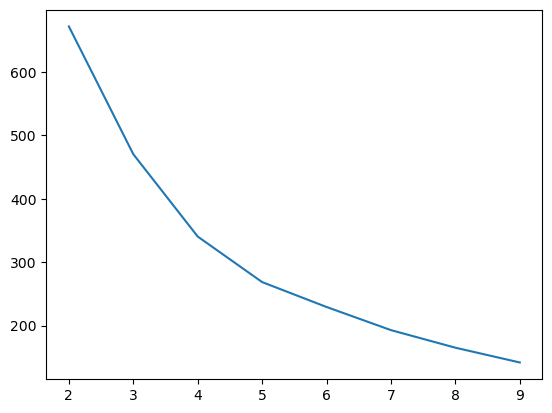

In [26]:
# elbow method 확인

distance = []
for k in range(2,10):
    k_model = KMeans(n_clusters = k, random_state = 27)
    k_model.fit(st_df)
    distance.append(k_model.inertia_)

# 그래프
sns.lineplot(x=range(2,10), y = distance) # 특별한 anker가 없음

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette = []

for k in range(2,10):
    k_model = KMeans(n_clusters = k, random_state = 27)
    labels = k_model.fit_predict(st_df)
    silhouette.append(silhouette_score(st_df, labels))

In [29]:
silhouette

[0.3717625086081594,
 0.37507693866618963,
 0.4323712086109757,
 0.3930850775191427,
 0.4011399672224946,
 0.3593335740941566,
 0.36828924013706404,
 0.3867968624121001]

<AxesSubplot:>

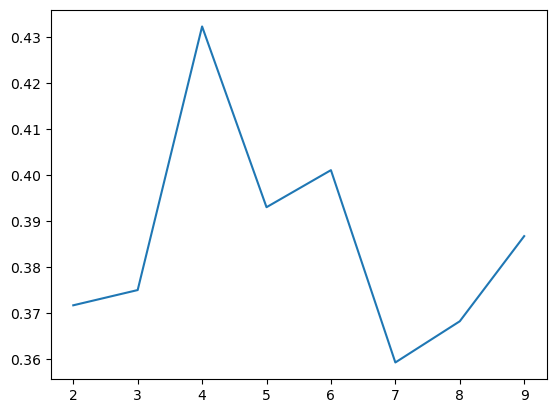

In [30]:
sns.lineplot(x=range(2,10), y=silhouette) # 4일때가 최선

In [31]:
k_model = KMeans(n_clusters=4, random_state=10)
labels=k_model.fit_predict(st_df)

In [36]:
st_df['label'] = labels

In [40]:
st_df_mean = st_df.groupby('label').mean()
st_df_mean

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,abel
label,,,,,,,,,,,,,
0,-0.953784,-0.805098,-0.804856,-0.750618,-0.718395,-0.989122,-0.922526,-0.978590,-0.769073,-0.863941,-0.752269,-0.268731,0.0
1,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,1.0
2,0.208144,0.064333,0.098411,0.895940,0.043383,0.377720,0.255870,0.561785,0.265056,0.364011,-0.046653,-0.262922,2.0
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,3.0


In [43]:
st_df_count = st_df.groupby('label').count().amt
count_form = st_df_count

In [44]:
st_df_count = st_df_count.rename('count')

In [45]:
st_df_all = st_df_mean.join(st_df_count)
st_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,abel,count
label,,,,,,,,,,,,,,
0,-0.953784,-0.805098,-0.804856,-0.750618,-0.718395,-0.989122,-0.922526,-0.978590,-0.769073,-0.863941,-0.752269,-0.268731,0.0,38
1,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,1.0,10
2,0.208144,0.064333,0.098411,0.895940,0.043383,0.377720,0.255870,0.561785,0.265056,0.364011,-0.046653,-0.262922,2.0,44
3,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,3.0,8


In [48]:
st_df_all.columns

Index(['amt', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery', 'category_health_fitness',
       'category_home', 'category_kids_pets', 'category_misc',
       'category_personal_care', 'category_shopping', 'category_travel',
       'abel', 'count'],
      dtype='object')

In [49]:
st_df_all.sum().sort_values(ascending = False) # 가장 많이 결제되는 품목 정렬

count                      100.000000
abel                         6.000000
category_shopping            2.462869
category_travel              2.256577
category_entertainment       2.190776
amt                          2.163013
category_food_dining         2.126287
category_home                2.072069
category_grocery             1.926118
category_health_fitness      1.720483
category_misc                1.189923
category_personal_care       1.162677
category_kids_pets           0.827681
category_gas_transport      -1.094309
dtype: float64

<AxesSubplot:xlabel='category_shopping', ylabel='category_travel'>

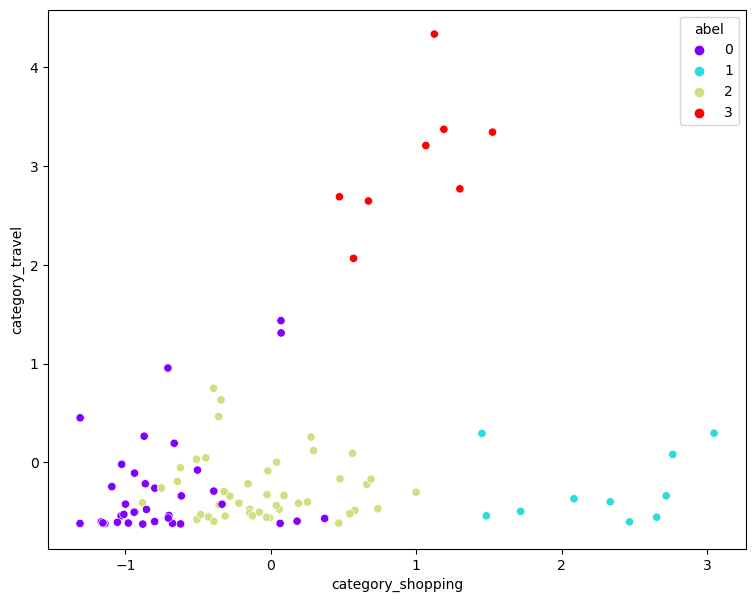

In [57]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='category_shopping', y='category_travel', data = st_df,
                hue = 'abel', palette = 'rainbow')

# 산점도의 각 카테고리 조합은 수십~수백개가 나올 수 있음

In [58]:
# pca 적용 후 그래프 시작
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

In [80]:
X = st_df.drop('amt', axis =1)
y = st_df['amt']

In [81]:
pca.fit(X)
df_pca = pca.transform(X) # 4차원으로 데이터프레임 축소

In [82]:
df_pca

array([[-4.07116415e+00,  3.72224434e-01,  2.60052637e-01,
        -1.89499475e-01],
       [ 3.14989627e+00,  1.02785231e-01, -1.86969733e+00,
        -7.16801547e-02],
       [ 3.58177215e+00, -2.58337291e+00,  2.50746966e+00,
        -5.21291686e-02],
       [-4.39495102e+00,  2.65167226e-01,  1.25871990e-01,
         1.39484366e-01],
       [ 2.70059606e+00, -1.15230527e-02, -2.06698392e+00,
        -2.73297349e-02],
       [ 1.23729598e+00, -1.20466125e+00, -4.51015427e-01,
        -3.15158584e-01],
       [-1.68415302e+00,  8.27715522e-02,  2.06491461e+00,
         4.93120504e-01],
       [ 1.64894617e+00, -6.86009501e-01, -1.55687783e+00,
        -3.68397846e-01],
       [ 5.92789149e-01, -6.69052343e-01, -1.42558256e+00,
        -5.40219427e-02],
       [-3.02381102e+00,  5.06272553e-01,  1.16114388e-01,
         3.10931551e-01],
       [ 8.27557880e-01, -9.60559345e-01, -5.81378354e-01,
         5.27486776e-01],
       [-4.45689893e+00,  2.10664443e-01,  2.06256435e-01,
      

In [83]:
df_pca2 = pd.DataFrame(df_pca, columns = ['PC1','PC2','PC3','PC4'])
df_pca2

,PC1,PC2,PC3,PC4
0,-4.071164,0.372224,0.260053,-0.189499
1,3.149896,0.102785,-1.869697,-0.071680
2,3.581772,-2.583373,2.507470,-0.052129
3,-4.394951,0.265167,0.125872,0.139484
4,2.700596,-0.011523,-2.066984,-0.027330
...,...,...,...,...
95,3.146278,0.125289,-2.197982,-0.591016
96,-2.321962,0.828338,0.068898,-0.798271
97,-3.711660,0.178121,1.143038,0.142108
98,-3.579006,0.059258,1.478783,0.144860


In [84]:
df2 = df_pca2.join(y)
df2

,PC1,PC2,PC3,PC4,amt
0,-4.071164,0.372224,0.260053,-0.189499,NaN
1,3.149896,0.102785,-1.869697,-0.071680,NaN
2,3.581772,-2.583373,2.507470,-0.052129,NaN
3,-4.394951,0.265167,0.125872,0.139484,NaN
4,2.700596,-0.011523,-2.066984,-0.027330,NaN
...,...,...,...,...,...
95,3.146278,0.125289,-2.197982,-0.591016,NaN
96,-2.321962,0.828338,0.068898,-0.798271,NaN
97,-3.711660,0.178121,1.143038,0.142108,NaN
98,-3.579006,0.059258,1.478783,0.144860,NaN


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

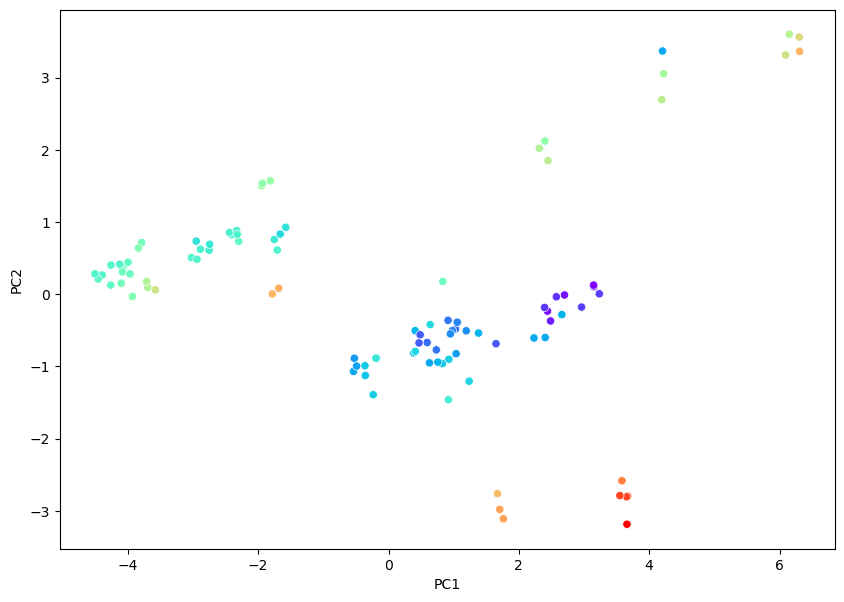

In [89]:
# 시각화는 총 12가짓수의 그래프로 표현이 가능함
plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y='PC2', hue = 'PC3',legend=False,
               data = df2, palette = 'rainbow')

<AxesSubplot:xlabel='PC1', ylabel='PC4'>

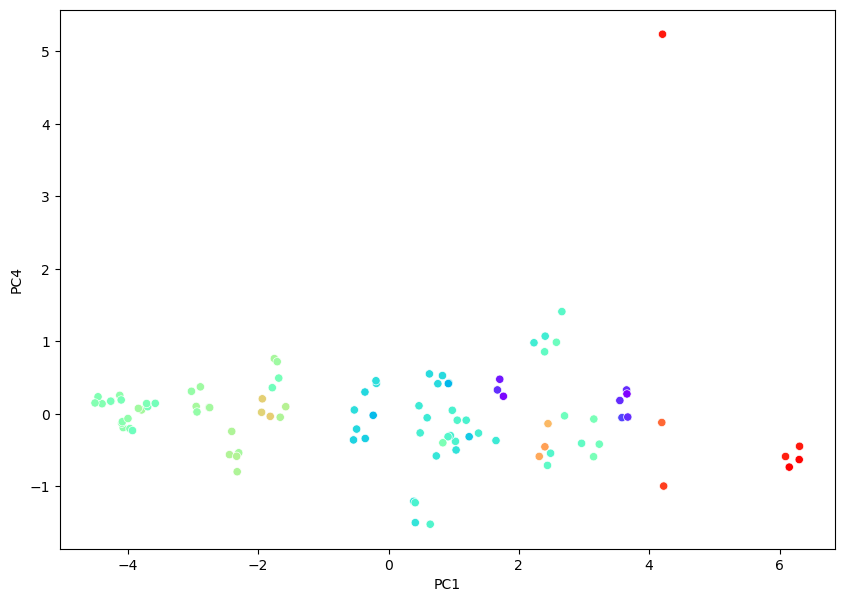

In [91]:
# 시각화는 총 12가짓수의 그래프로 표현이 가능함
plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y='PC4', hue = 'PC2',legend=False,
               data = df2, palette = 'rainbow')